## Data Description
In this competition, you will predict the probability that an auto insurance policy holder files a claim.

In the train and test data, features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc). In addition, feature names include the postfix bin to indicate binary features and cat to indicate categorical features. Features without these designations are either continuous or ordinal. Values of -1 indicate that the feature was missing from the observation. The target columns signifies whether or not a claim was filed for that policy holder.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats #For Chi-square Test

In [2]:
df = pd.read_csv("train.csv",na_values=-1)
df.shape

(595212, 59)

#### Total Records = 595212
#### Total Features = 59

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   594996 non-null  float64
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595129 non-null  float64
 6   ps_ind_05_cat   589403 non-null  float64
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

## Target Varible

In [4]:
df['target'].unique()

array([0, 1], dtype=int64)

In [5]:
count = {'count': df['target'].value_counts()}
target_info_df = pd.DataFrame(count)

In [6]:
target_info_df['Percent'] = (target_info_df/df.shape[0])*100

In [7]:
target_info_df

count    Percent
0  573518  96.355248
1   21694   3.644752

In [8]:
target = df['target']

In [9]:
df.drop(columns=['target'],inplace=True)

- It looks like we have imbalance dataset
- With Predominent 0's

## Creating Metadata Dataframe

In [10]:
df_metedata = pd.DataFrame({'DTypes':df.dtypes})

- Making all the features ending with __'_bin'__ and __'_cat'__ are now maked as categorical

In [11]:
for col in df.columns:
    if '_cat' in col or '_bin' in col:
        df_metedata.loc[col,'DTypes'] = 'Categorical'
    elif df[col].dtype == 'int64':
        df_metedata.loc[col,'DTypes'] = 'int64'
    elif df[col].dtype == 'float64':
        df_metedata.loc[col,'DTypes'] = 'float64'

- Among the remaining columns that were not gone with D-Type check up we know Float should be Continious and Int type can be either Continious or Ordinal

- The only question is wheather the features of Data Type Int are Continious or Ordinal?

In [12]:
df_metedata['Dropped']=False
df_metedata['Missing'] = np.nan

In [13]:
df_metedata.loc['id','Missing'] = np.nan
df_metedata.loc['id','Dropped'] = True

## Missing Values
- Missing values of Categorical Varibles are filled with __MODE__
- Missing values of Continious Varibles are filled with __MEAN__
- We are unsure which features of type int are Ordinal and Continious.So we will fill them with __MODE__ which can be done in both cases
- __NOTE__: Missing values are referred as -1 in the dataset

- Let's Replace -1 with __NAN__

In [14]:
df.replace(to_replace=-1,value=np.nan,inplace=True)

- Sort the Feature with missing values

In [15]:
df.isnull().sum().sort_values(ascending=False)

ps_car_03_cat     411231
ps_car_05_cat     266551
ps_reg_03         107772
ps_car_14          42620
ps_car_07_cat      11489
ps_ind_05_cat       5809
ps_car_09_cat        569
ps_ind_02_cat        216
ps_car_01_cat        107
ps_ind_04_cat         83
ps_car_11              5
ps_car_02_cat          5
ps_car_12              1
ps_ind_17_bin          0
ps_reg_02              0
ps_reg_01              0
ps_ind_18_bin          0
ps_ind_14              0
ps_ind_16_bin          0
ps_ind_15              0
ps_ind_13_bin          0
ps_ind_12_bin          0
ps_ind_11_bin          0
ps_ind_10_bin          0
ps_ind_09_bin          0
ps_ind_08_bin          0
ps_ind_07_bin          0
ps_ind_06_bin          0
ps_ind_03              0
ps_ind_01              0
ps_car_04_cat          0
ps_calc_20_bin         0
ps_car_06_cat          0
ps_calc_19_bin         0
ps_calc_18_bin         0
ps_calc_17_bin         0
ps_calc_16_bin         0
ps_calc_15_bin         0
ps_calc_14             0
ps_calc_13             0


In [16]:
(411231/df.shape[0])*100

69.08983689844963

- DROP 'ps_car_03_cat' as it has many missing values

In [17]:
df_metedata.loc['ps_car_03_cat','Dropped'] = True

In [18]:
df.drop(columns=['ps_car_03_cat'],inplace=True)

In [19]:
for col in df.columns:
    if '_cat' in col or '_bin' in col:
        df[col].fillna(int(df[col].mode()[0]),inplace=True)
        df_metedata.loc[col,'Missing'] = int(df[col].mode()[0])
    elif df[col].dtype == 'int64':
        df[col].fillna(int(df[col].mode()[0]),inplace=True)
        df_metedata.loc[col,'Missing'] = int(df[col].mode()[0])
    else:
        df[col].fillna(df[col].mean(),inplace=True)
        df_metedata.loc[col,'Missing'] = df[col].mean()

In [20]:
df.columns

Index(['id', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13',
       'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03',
       'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08',
       'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13',
       'ps_calc_14', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin',
       'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin'],
      dtype='object')

### Making Data into multiple folds

##### The idea is to make the whole data in to n-folds such that: 
- Taking equal porportions of majority class and keeping the minority intact
- Each fold is a balance dataset

In [21]:
df_minority = df.loc[target == 1].copy()
df_minority['target'] = target.loc[target == 1].copy()

In [22]:
df_majority = df.loc[target == 0].copy()
df_majority['target'] = target.loc[target == 0].copy()

In [23]:
df_majority.shape, df_minority.shape

((573518, 58), (21694, 58))

In [23]:
df_majority.columns

Index(['id', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13',
       'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03',
       'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08',
       'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13',
       'ps_calc_14', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin',
       'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin', 'target'],
      dtype='object')

- Lets make the data in to 20 folds

In [24]:
splitted_frame = np.array_split(df_majority, 20)

## Creating the chi-square test function

In [25]:
def chi2_test(col):
    count = 0
    splitted_frames = splitted_frame
    for frame in splitted_frames:
        chunks = [frame,df_minority]
        df_test = pd.concat(chunks,axis = 0)
        crosstab_col = pd.crosstab(df_test[col],df_test['target'])
        pValue = scipy.stats.chi2_contingency(crosstab_col)[1]
        if pValue < 0.05:
            count = count + 1
    if count >= 10:
        print('Consider this feature')
    else:
        print("Don't consider this feature")

###  Creating the ANOVA test function

In [26]:
def anova_test(col):
    count = 0
    splitted_frames = splitted_frame
    for frame in splitted_frames:
        chunks = [frame,df_minority]
        df_test = pd.concat(chunks,axis=0)
        pValue = scipy.stats.f_oneway(df_test[col],df_test['target'])[1]
        if pValue < 0.05:
            count = count + 1
    if count >= 10:
        print('Consider this feature')
    else:
        print("Don't consider this feature")

### Feature __ps_ind_01__

In [27]:
df['ps_ind_01'].nunique()

8

- It is highly improblable for the feature __ps_ind_01__ to be a Continious with only 8 unique values among 595212 records..so it has to be ordinal even data seems like that

In [28]:
df_metedata.loc['ps_ind_01','DTypes'] = 'Ordinal'

In [29]:
crosstab_ps_ind_01 = pd.crosstab(df['ps_ind_01'],target)
crosstab_ps_ind_01

target          0     1
ps_ind_01              
0          181362  6232
1          139142  4842
2           79428  3040
3           49096  2097
4           32011  1513
5           58986  2478
6           16919   763
7           16574   729

In [30]:
chi2_test('ps_ind_01')

Consider this feature


- Correlation exsist between ps_ind_01 and target
- Considering this feature in to the model building

### Feature ps_ind_02_cat

In [31]:
df['ps_ind_02_cat'].nunique()

4

In [32]:
df_metedata.loc['ps_ind_02_cat','DTypes']

'Categorical'

In [33]:
crosstab_ps_ind_02_cat = pd.crosstab(df['ps_ind_02_cat'],target)
crosstab_ps_ind_02_cat

target              0      1
ps_ind_02_cat               
1.0            416607  15468
2.0            118860   4713
3.0             27137   1049
4.0             10914    464

In [34]:
chi2_test('ps_ind_02_cat')

Consider this feature


- Correlation exsist between ps_ind_02_cat	 and target
- Considering this feature in to the model building

### Feature ps_ind_03

In [35]:
df['ps_ind_03'].nunique()

12

In [36]:
df_metedata.loc['ps_ind_03','DTypes']

'int64'

- It his highly imporblable for the feature ps_ind_03 to be continious with only 12 unique values among 595212, so it has to be ordinal

In [37]:
crosstab_ps_ind_03 = pd.crosstab(df['ps_ind_03'],target)
crosstab_ps_ind_03

target         0     1
ps_ind_03             
0          14539   975
1          65469  2525
2          93194  2916
3          79550  2423
4          64984  2229
5          60365  2438
6          57881  2525
7          50195  2169
8          38122  1545
9          24536   900
10         13897   587
11         10786   462

In [38]:
chi2_test('ps_ind_03')

Consider this feature


- Correlation exsist between ps_ind_03 and target
- Considering this feature in to the model building

### Feature ps_ind_04_cat

In [39]:
df['ps_ind_04_cat'].nunique()

2

In [40]:
crosstab_ps_ind_04_cat = pd.crosstab(df['ps_ind_04_cat'],target)
crosstab_ps_ind_04_cat

target              0      1
ps_ind_04_cat               
0.0            334944  12104
1.0            238574   9590

In [41]:
chi2_test('ps_ind_04_cat')

Consider this feature


- Correlation exsist between ps_ind_04_cat and target
- Considering this feature in to the model building

### Feature ps_ind_05_cat

In [42]:
df['ps_ind_05_cat'].nunique()

7

In [43]:
crosstab_ps_ind_05_cat = pd.crosstab(df['ps_ind_05_cat'],target)
crosstab_ps_ind_05_cat

target              0      1
ps_ind_05_cat               
0.0            515453  18365
1.0              7924    398
2.0              3868    316
3.0              7879    354
4.0             17389    955
5.0              1569     80
6.0             19436   1226

In [44]:
chi2_test('ps_ind_05_cat')

Consider this feature


- Correlation exsist between ps_ind_05_cat and target
- Considering this feature in to the model building

### Feature ps_ind_06_bin

In [45]:
df['ps_ind_06_bin'].nunique()

2

In [46]:
crosstab_ps_ind_06_bin = pd.crosstab(df['ps_ind_06_bin'],target)
crosstab_ps_ind_06_bin

target              0      1
ps_ind_06_bin               
0              345846  15006
1              227672   6688

In [47]:
chi2_test('ps_ind_06_bin')

Consider this feature


- Correlation exsist between ps_ind_06_bin and target
- Considering this feature in to the model building

### Feature ps_ind_07_bin

In [48]:
df['ps_ind_07_bin'].nunique()

2

In [49]:
crosstab_ps_ind_07_bin = pd.crosstab(df['ps_ind_07_bin'],target)
crosstab_ps_ind_07_bin

target              0      1
ps_ind_07_bin               
0              427773  14450
1              145745   7244

In [50]:
chi2_test('ps_ind_07_bin')

Consider this feature


- Correlation exsist between ps_ind_07_bin and target
- Considering this feature in to the model building

### Feature ps_ind_08_bin

In [51]:
df['ps_ind_08_bin'].nunique()

2

In [52]:
crosstab_ps_ind_08_bin = pd.crosstab(df['ps_ind_08_bin'],target)
crosstab_ps_ind_08_bin

target              0      1
ps_ind_08_bin               
0              480049  17595
1               93469   4099

In [53]:
chi2_test('ps_ind_08_bin')

Consider this feature


- Correlation exsist between ps_ind_08_bin and target
- Considering this feature in to the model building

### Feature ps_ind_09_bin

In [54]:
df['ps_ind_09_bin'].nunique()

2

In [55]:
crosstab_ps_ind_09_bin = pd.crosstab(df['ps_ind_09_bin'],target)
crosstab_ps_ind_09_bin

target              0      1
ps_ind_09_bin               
0              466886  18031
1              106632   3663

In [56]:
chi2_test('ps_ind_09_bin')

Consider this feature


- Correlation exsist between ps_ind_09_bin and target
- Considering this feature in to the model building

### Feature ps_ind_10_bin

In [57]:
df['ps_ind_10_bin'].nunique()

2

In [58]:
crosstab_ps_ind_10_bin = pd.crosstab(df['ps_ind_10_bin'],target)
crosstab_ps_ind_10_bin

target              0      1
ps_ind_10_bin               
0              573308  21682
1                 210     12

In [59]:
chi2_test('ps_ind_10_bin')

Don't consider this feature


- Correlation doesn't exsist between ps_ind_10_bin and target
- Not Considering this feature in to the model building

In [60]:
df_metedata.loc['ps_ind_10_bin','Dropped'] = True

### Feature ps_ind_11_bin

In [61]:
df['ps_ind_11_bin'].nunique()

2

In [62]:
crosstab_ps_ind_11_bin = pd.crosstab(df['ps_ind_11_bin'],target)
crosstab_ps_ind_11_bin

target              0      1
ps_ind_11_bin               
0              572557  21648
1                 961     46

In [63]:
chi2_test('ps_ind_11_bin')

Don't consider this feature


- Correlation doesn't exsist between ps_ind_11_bin and target
- Not Considering this feature in to the model building

In [64]:
df_metedata.loc['ps_ind_11_bin','Dropped'] = True

### Feature ps_ind_12_bin

In [65]:
df['ps_ind_12_bin'].nunique()

2

In [66]:
crosstab_ps_ind_12_bin = pd.crosstab(df['ps_ind_12_bin'],target)
crosstab_ps_ind_12_bin

target              0      1
ps_ind_12_bin               
0              568189  21405
1                5329    289

In [67]:
chi2_test('ps_ind_12_bin')

Consider this feature


- Correlation exsist between ps_ind_12_bin and target
- Considering this feature in to the model building

### Feature ps_ind_13_bin

In [68]:
df['ps_ind_13_bin'].nunique()

2

In [69]:
crosstab_ps_ind_13_bin = pd.crosstab(df['ps_ind_13_bin'],target)
crosstab_ps_ind_13_bin

target              0      1
ps_ind_13_bin               
0              572983  21665
1                 535     29

In [70]:
chi2_test('ps_ind_13_bin')

Don't consider this feature


- Correlation doesn't exsist between ps_ind_13_bin and target
- Not Considering this feature in to the model building

In [71]:
df_metedata.loc['ps_ind_13_bin','Dropped'] = True

### Feature ps_ind_16_bin

In [72]:
df['ps_ind_16_bin'].nunique()

2

In [73]:
crosstab_ps_ind_16_bin = pd.crosstab(df['ps_ind_16_bin'],target)
crosstab_ps_ind_16_bin

target              0      1
ps_ind_16_bin               
0              193057   8825
1              380461  12869

In [74]:
chi2_test('ps_ind_16_bin')

Consider this feature


- Correlation exsist between ps_ind_16_bin and target
- Considering this feature in to the model building

### Feature ps_ind_17_bin

In [75]:
df['ps_ind_17_bin'].nunique()

2

In [76]:
crosstab_ps_ind_17_bin = pd.crosstab(df['ps_ind_17_bin'],target)
crosstab_ps_ind_17_bin

target              0      1
ps_ind_17_bin               
0              505424  17719
1               68094   3975

In [77]:
chi2_test('ps_ind_17_bin')

Consider this feature


- Correlation exsist between ps_ind_17_bin and target
- Considering this feature in to the model building

### Feature ps_ind_18_bin

In [78]:
df['ps_ind_18_bin'].nunique()

2

In [79]:
crosstab_ps_ind_18_bin = pd.crosstab(df['ps_ind_18_bin'],target)
crosstab_ps_ind_18_bin

target              0      1
ps_ind_18_bin               
0              485697  18182
1               87821   3512

In [80]:
chi2_test('ps_ind_18_bin')

Consider this feature


- Correlation exsist between ps_ind_18_bin and target
- Considering this feature in to the model building

### Feature ps_car_01_cat

In [81]:
df['ps_car_01_cat'].nunique()

12

In [82]:
crosstab_ps_car_01_cat = pd.crosstab(df['ps_car_01_cat'],target)
crosstab_ps_car_01_cat

target              0     1
ps_car_01_cat              
0.0              5645   259
1.0              1303    64
2.0              2052    92
3.0              6408   250
4.0             25149  1025
5.0             17430   712
6.0             60536  1857
7.0            174090  5157
8.0             14438   655
9.0             19217  1106
10.0            48235  1852
11.0           199015  8665

In [83]:
chi2_test('ps_car_01_cat')

Consider this feature


- Correlation exsist between ps_car_01_cat and target
- Considering this feature in to the model building

### Feature ps_car_02_cat

In [84]:
df['ps_car_02_cat'].nunique()

2

In [85]:
crosstab_ps_car_02_cat = pd.crosstab(df['ps_car_02_cat'],target)
crosstab_ps_car_02_cat

target              0      1
ps_car_02_cat               
0.0             96206   5011
1.0            477312  16683

In [86]:
chi2_test('ps_car_02_cat')

Consider this feature


- Correlation exsist between ps_car_02_cat and target
- Considering this feature in to the model building

### Feature ps_car_04_cat

In [87]:
df['ps_car_04_cat'].nunique()

10

In [88]:
crosstab_ps_car_04_cat = pd.crosstab(df['ps_car_04_cat'],target)
crosstab_ps_car_04_cat

target              0      1
ps_car_04_cat               
0              479970  16611
1               30547   1568
2               22648   1122
3                 607     33
4                 225      5
5                 506     39
6                1468     92
7                 126     13
8               19565   1033
9               17856   1178

In [89]:
chi2_test('ps_car_04_cat')

Consider this feature


- Correlation exsist between ps_car_04_cat and target
- Considering this feature in to the model building

### Feature ps_car_05_cat

In [90]:
df['ps_car_05_cat'].nunique()

2

In [91]:
crosstab_ps_car_05_cat = pd.crosstab(df['ps_car_05_cat'],target)
crosstab_ps_car_05_cat

target              0      1
ps_car_05_cat               
0.0            149737   6257
1.0            423781  15437

In [92]:
chi2_test('ps_car_05_cat')

Consider this feature


- Correlation exsist between ps_car_05_cat and target
- Considering this feature in to the model building

### Feature ps_car_06_cat

In [93]:
df['ps_car_06_cat'].nunique()

18

In [94]:
crosstab_ps_car_06_cat = pd.crosstab(df['ps_car_06_cat'],target)
crosstab_ps_car_06_cat

target              0     1
ps_car_06_cat              
0              106735  3685
1              114339  4047
2                1501   106
3               11539   458
4               30082  1054
5                1307    94
6               20180   771
7               15531   627
8                1314    98
9               16648   969
10              31990  1476
11             127355  4172
12               2270   116
13               5890   356
14              57221  2032
15              20621  1111
16               4375   207
17               4620   315

In [95]:
chi2_test('ps_car_06_cat')

Consider this feature


- Correlation exsist between ps_car_06_cat and target
- Considering this feature in to the model building

### Feature ps_car_07_cat

In [96]:
df['ps_car_07_cat'].nunique()

2

In [97]:
crosstab_ps_car_07_cat = pd.crosstab(df['ps_car_07_cat'],target)
crosstab_ps_car_07_cat

target              0      1
ps_car_07_cat               
0.0             29010   1565
1.0            544508  20129

In [98]:
chi2_test('ps_car_07_cat')

Consider this feature


- Correlation exsist between ps_car_07_cat and target
- Considering this feature in to the model building

### Feature ps_car_08_cat

In [99]:
df['ps_car_08_cat'].nunique()

2

In [100]:
crosstab_ps_car_08_cat = pd.crosstab(df['ps_car_08_cat'],target)
crosstab_ps_car_08_cat

target              0      1
ps_car_08_cat               
0               95457   4491
1              478061  17203

In [101]:
chi2_test('ps_car_08_cat')

Consider this feature


- Correlation exsist between ps_car_08_cat and target
- Considering this feature in to the model building

### Feature ps_car_09_cat

In [102]:
df['ps_car_09_cat'].nunique()

5

In [103]:
crosstab_ps_car_09_cat = pd.crosstab(df['ps_car_09_cat'],target)
crosstab_ps_car_09_cat

target              0      1
ps_car_09_cat               
0.0            188032   6486
1.0             27424   1656
2.0            341161  12890
3.0             14238    518
4.0              2663    144

In [104]:
chi2_test('ps_car_09_cat')

Consider this feature


- Correlation exsist between ps_car_09_cat and target
- Considering this feature in to the model building

### Feature ps_car_10_cat

In [105]:
df['ps_car_10_cat'].nunique()

3

In [106]:
crosstab_ps_car_10_cat = pd.crosstab(df['ps_car_10_cat'],target)
crosstab_ps_car_10_cat

target              0      1
ps_car_10_cat               
0                4690    167
1              568659  21520
2                 169      7

In [107]:
chi2_test('ps_car_10_cat')

Don't consider this feature


- Correlation doesn't exsist between ps_car_10_cat and target
- Not Considering this feature in to the model building

In [108]:
df_metedata.loc['ps_car_10_cat','Dropped'] = True

### Feature ps_car_11_cat

In [109]:
df['ps_car_11_cat'].nunique()

104

In [110]:
crosstab_ps_car_11_cat = pd.crosstab(df['ps_car_11_cat'],target)
crosstab_ps_car_11_cat

target             0     1
ps_car_11_cat             
1               3196   135
2               2456    97
3               3022   163
4               1499    97
5              11988   525
...              ...   ...
100             4212   233
101             7058   281
102             2032    71
103            23615   647
104            81253  3830

[104 rows x 2 columns]

In [111]:
chi2_test('ps_car_11_cat')

Consider this feature


- Correlation exsist between ps_car_11_cat and target
- Considering this feature in to the model building

### Feature ps_calc_15_bin

In [112]:
df['ps_calc_15_bin'].nunique()

2

In [113]:
crosstab_ps_calc_15_bin = pd.crosstab(df['ps_calc_15_bin'],target)
crosstab_ps_calc_15_bin

target               0      1
ps_calc_15_bin               
0               503286  19056
1                70232   2638

In [114]:
chi2_test('ps_calc_15_bin')

Don't consider this feature


- Correlation doesn't exsist between ps_calc_15_bin and target
- Not Considering this feature in to the model building

In [115]:
df_metedata.loc['ps_calc_15_bin','Dropped']= True

### Feature ps_calc_16_bin

In [116]:
df['ps_calc_16_bin'].nunique()

2

In [117]:
crosstab_ps_calc_16_bin = pd.crosstab(df['ps_calc_16_bin'],target)
crosstab_ps_calc_16_bin

target               0      1
ps_calc_16_bin               
0               213474   8040
1               360044  13654

In [118]:
chi2_test('ps_calc_16_bin')

Don't consider this feature


- Correlation doesn't exsist between ps_calc_16_bin and target
- Not Considering this feature in to the model building

In [119]:
df_metedata.loc['ps_calc_16_bin','Dropped'] = True

### Feature ps_calc_17_bin

In [120]:
df['ps_calc_17_bin'].nunique()

2

In [121]:
crosstab_ps_calc_17_bin = pd.crosstab(df['ps_calc_17_bin'],target)
crosstab_ps_calc_17_bin

target               0      1
ps_calc_17_bin               
0               255675   9681
1               317843  12013

In [122]:
chi2_test('ps_calc_17_bin')

Don't consider this feature


- Correlation doesn't exsist between ps_calc_17_bin and target
- Not Considering this feature in to the model building

In [123]:
df_metedata.loc['ps_calc_17_bin','Dropped'] = True

### Feature ps_calc_18_bin

In [124]:
df['ps_calc_18_bin'].nunique()

2

In [125]:
crosstab_ps_calc_18_bin = pd.crosstab(df['ps_calc_18_bin'],target)
crosstab_ps_calc_18_bin

target               0      1
ps_calc_18_bin               
0               408842  15436
1               164676   6258

In [126]:
chi2_test('ps_calc_18_bin')

Don't consider this feature


- Correlation doesn't exsist between ps_calc_18_bin and target
- Not Considering this feature in to the model building

In [127]:
df_metedata.loc['ps_calc_18_bin','Dropped'] = True

### ps_calc_19_bin

In [128]:
df['ps_calc_19_bin'].nunique()

2

In [129]:
crosstab_ps_calc_19_bin = pd.crosstab(df['ps_calc_19_bin'],target)
crosstab_ps_calc_19_bin

target               0      1
ps_calc_19_bin               
0               373254  14215
1               200264   7479

In [130]:
chi2_test('ps_calc_19_bin')

Don't consider this feature


- Correlation doesn't exsist between ps_calc_19_bin and target
- Not Considering this feature in to the model building

In [131]:
df_metedata.loc['ps_calc_19_bin','Dropped'] = True

### Feature ps_calc_20_bin

In [132]:
df['ps_calc_20_bin'].nunique()

2

In [133]:
crosstab_ps_calc_20_bin = pd.crosstab(df['ps_calc_20_bin'],target)
crosstab_ps_calc_20_bin

target               0      1
ps_calc_20_bin               
0               485544  18411
1                87974   3283

In [134]:
chi2_test('ps_calc_20_bin')

Don't consider this feature


- Correlation doesn't exsist between ps_calc_20_bin and target
- Not Considering this feature in to the model building

In [135]:
df_metedata.loc['ps_calc_20_bin','Dropped'] = True

### Feature ps_ind_14

In [136]:
df['ps_ind_14'].nunique()

5

In [137]:
df_metedata.loc['ps_ind_14','DTypes']

'int64'

- It is highly improblable for the feature ps_ind_14 to be a Continious with only 5 unique values among 595212 records..so it has to be ordinal even data seems like that

In [138]:
df_metedata.loc['ps_ind_14','DTypes'] = 'Ordinal'

In [139]:
crosstab_ps_ind_14 = pd.crosstab(df['ps_ind_14'],target)
crosstab_ps_ind_14

target          0      1
ps_ind_14               
0          567457  21375
1            5222    273
2             708     36
3             127      9
4               4      1

In [140]:
chi2_test('ps_ind_14')

Consider this feature


- Correlation exsist between ps_ind_14 and target
- Considering this feature in to the model building

### Feature ps_ind_15

In [141]:
df['ps_ind_15'].nunique()

14

- It is highly improblable for the feature ps_ind_15 to be a Continious with only 14 unique values among 595212 records..so it has to be ordinal even data seems like that

In [142]:
df_metedata.loc['ps_ind_15','DTypes'] = 'Ordinal'

In [143]:
crosstab_ps_ind_15 = pd.crosstab(df['ps_ind_15'],target)
crosstab_ps_ind_15

target         0     1
ps_ind_15             
0          30464  1362
1          11082   535
2          17836   839
3          31015  1252
4          40141  1629
5          40888  1665
6          56081  2327
7          62765  2571
8          57458  2142
9          44090  1407
10         52463  1878
11         51593  1622
12         43474  1377
13         34168  1088

In [144]:
chi2_test('ps_ind_15')

Consider this feature


- Correlation exsist between ps_ind_15 and target
- Considering this feature in to the model building

### Feature ps_reg_01

In [145]:
df['ps_reg_01'].nunique()

10

In [146]:
df_metedata.loc['ps_reg_01','DTypes']

'float64'

In [147]:
df['ps_reg_01']

0         0.7
1         0.8
2         0.0
3         0.9
4         0.7
         ... 
595207    0.5
595208    0.9
595209    0.9
595210    0.9
595211    0.1
Name: ps_reg_01, Length: 595212, dtype: float64

- It is highly improblable for the feature ps_reg_01 to be a Continious with only 10 unique values among 595212 records..so it has to be ordinal even data seems like that

In [148]:
df_metedata.loc['ps_reg_01','DTypes'] = 'Ordinal'

In [149]:
crosstab_ps_reg_01 = pd.crosstab(df['ps_reg_01'],target)
crosstab_ps_reg_01

target          0     1
ps_reg_01              
0.0         20831   851
0.1         42163  1029
0.2         24427   686
0.3         39004  1286
0.4         51721  1848
0.5         31333  1008
0.6         54208  2035
0.7         65275  2622
0.8         57953  2324
0.9        186603  8005

In [150]:
chi2_test('ps_reg_01')

Consider this feature


- Correlation exsist between ps_reg_01 and target
- Considering this feature in to the model building

### Feature ps_reg_02

In [151]:
df['ps_reg_02'].nunique()

19

In [152]:
df_metedata.loc['ps_reg_02','DTypes']

'float64'

In [153]:
df['ps_reg_02'].value_counts()

0.2    114886
0.3     95033
0.0     89297
0.4     59746
0.5     36528
0.6     33474
0.1     31816
0.7     21210
0.8     19907
0.9     16788
1.2     15843
1.0     12570
1.3     11761
1.1     11321
1.4      6877
1.5      5845
1.6      5095
1.8      4737
1.7      2478
Name: ps_reg_02, dtype: int64

- It is highly improblable for the feature ps_reg_02 to be a Continious with only 19 unique values among 595212 records..so it has to be ordinal even data seems like that

In [154]:
df_metedata.loc['ps_reg_02','DTypes'] = 'Ordinal'

In [155]:
crosstab_ps_reg_02 = pd.crosstab(df['ps_reg_02'],target)
crosstab_ps_reg_02

target          0     1
ps_reg_02              
0.0         86281  3016
0.1         31043   773
0.2        111554  3332
0.3         91825  3208
0.4         57564  2182
0.5         35092  1436
0.6         32037  1437
0.7         20308   902
0.8         19023   884
0.9         16000   788
1.0         12034   536
1.1         10807   514
1.2         15045   798
1.3         11190   571
1.4          6548   329
1.5          5582   263
1.6          4808   287
1.7          2338   140
1.8          4439   298

In [156]:
chi2_test('ps_reg_02')

Consider this feature


- Correlation exsist between ps_reg_02 and target
- Considering this feature in to the model building

### Feature ps_reg_03

In [157]:
df['ps_reg_03'].nunique()

5013

In [158]:
df_metedata.loc['ps_reg_03','DTypes']

'float64'

In [159]:
df['ps_reg_03'].value_counts()

0.894047    107772
0.633936       664
0.602599       637
0.704894       627
0.587899       616
             ...  
0.301040         1
1.409787         1
2.090155         1
1.772357         1
1.888452         1
Name: ps_reg_03, Length: 5013, dtype: int64

- It is continious Varible

In [160]:
df['ps_reg_03'].max()

4.0379450219

In [161]:
df['ps_reg_03'].min()

0.06123724360000001

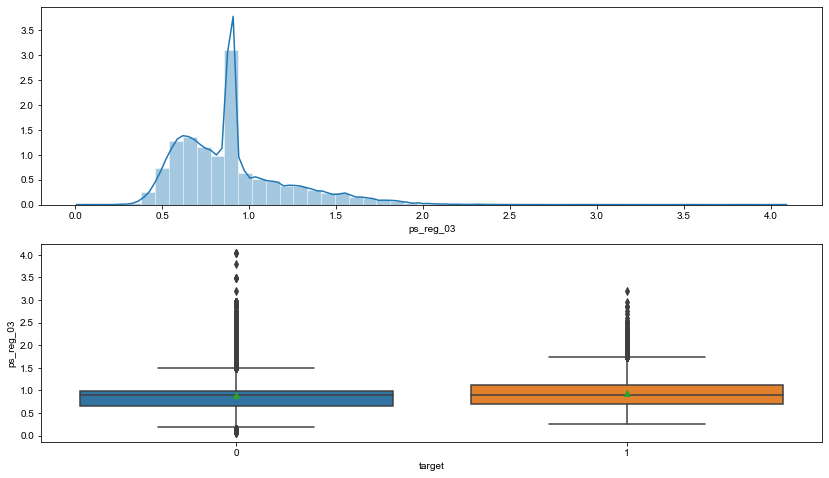

In [162]:
fig,ax = plt.subplots(2,1,figsize=(14,8))
ax1,ax2 = ax.flatten()
sns.set_style("whitegrid")
sns.distplot(df['ps_reg_03'],ax=ax1)
sns.boxplot(x=target,y=df['ps_reg_03'],showmeans=True,ax=ax2)

In [163]:
anova_test('ps_reg_03')

Consider this feature


- Correlation exsist between ps_reg_03 and target
- Considering this feature in to the model building

### Feature ps_car_11

In [164]:
df['ps_car_11'].nunique()

5

In [165]:
df['ps_car_11'].dtype

dtype('float64')

In [166]:
df_metedata.loc['ps_car_11','DTypes']

'float64'

- It is highly improblable for the feature ps_car_11 to be a Continious with only 5 unique values among 595212 records..so it has to be ordinal even data seems like that

In [167]:
df_metedata.loc['ps_car_11','DTypes'] = 'Ordinal'

In [168]:
crosstab_ps_car_11 = pd.crosstab(df['ps_car_11'],target)
crosstab_ps_car_11

target          0      1
ps_car_11               
0.0000      24760   1223
1.0000      59290   1662
2.0000     182047   7306
2.3461          5      0
3.0000     307416  11503

In [169]:
chi2_test('ps_car_11')

Consider this feature


- Correlation exsist between ps_car_11 and target
- Considering this feature in to the model building

### Feature ps_car_12

In [170]:
df['ps_car_12'].nunique()

184

In [171]:
df_metedata.loc['ps_car_12','DTypes']

'float64'

In [172]:
df['ps_car_12'].value_counts()

0.316228    170579
0.400000    111873
0.374166     98598
0.447214     49318
0.424264     49293
             ...  
0.591439         1
0.581206         1
0.370405         1
0.379947         1
0.446766         1
Name: ps_car_12, Length: 184, dtype: int64

- It is continious Varible

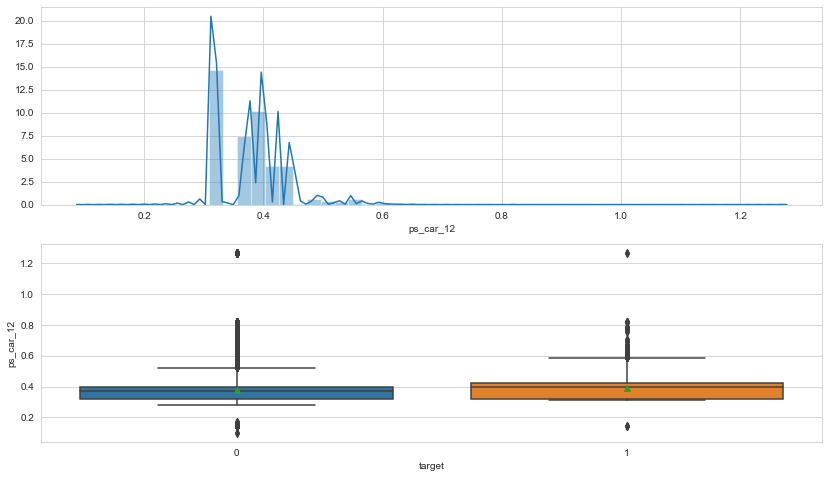

In [173]:
fig,ax = plt.subplots(2,1,figsize=(14,8))
ax1,ax2 = ax.flatten()
sns.set_style("whitegrid")
sns.distplot(df['ps_car_12'],ax=ax1)
sns.boxplot(x=target,y=df['ps_car_12'],showmeans=True,ax=ax2)

In [174]:
df['ps_car_12'].max()

1.2649110641

In [175]:
df['ps_car_12'].min()

0.1

In [176]:
anova_test('ps_car_12')

Consider this feature


- Correlation exsist between ps_car_12 and target
- Considering this feature in to the model building

### Feature ps_car_13

In [177]:
df['ps_car_13'].nunique()

70482

In [178]:
df_metedata.loc['ps_car_13','DTypes']

'float64'

In [179]:
df['ps_car_13'].value_counts()

0.674583    386
0.741689    377
0.692776    363
0.841781    362
0.749228    353
           ... 
1.113268      1
1.517569      1
0.808997      1
1.175791      1
0.500000      1
Name: ps_car_13, Length: 70482, dtype: int64

- It is Continious Varible

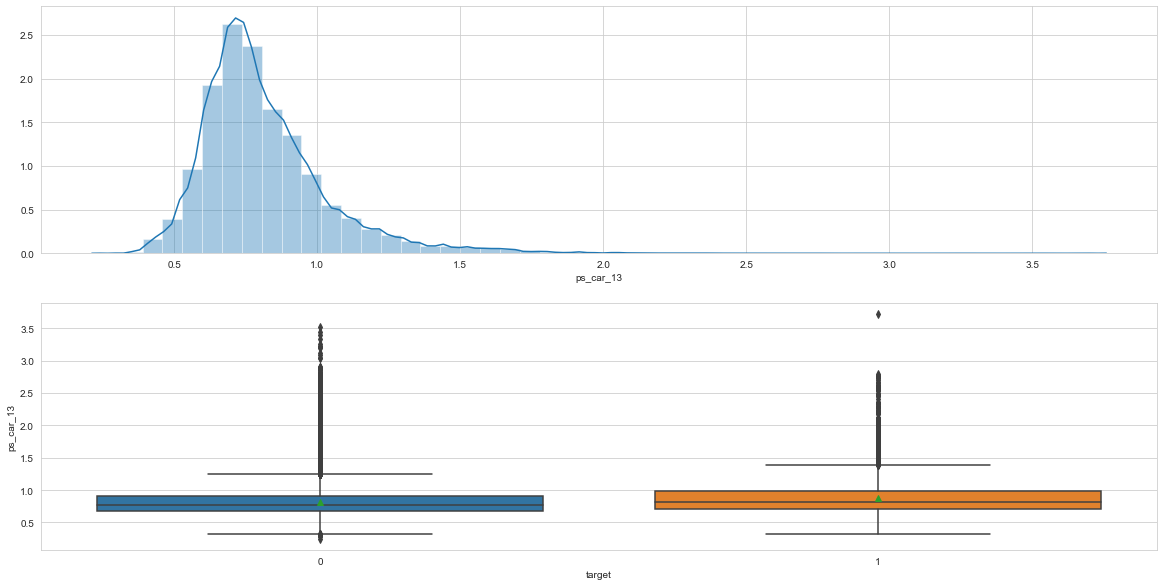

In [180]:
fig,ax = plt.subplots(2,1,figsize=(20,10))
ax1,ax2 = ax.flatten()
sns.distplot(df['ps_car_13'],ax=ax1)
sns.boxplot(x=target,y=df['ps_car_13'],showmeans=True,ax=ax2)

In [181]:
df['ps_car_13'].max()

3.7206260026

In [182]:
anova_test('ps_car_13')

Consider this feature


- Correlation exsist between ps_car_13 and target
- Considering this feature in to the model building

### Feature ps_car_14

In [183]:
df['ps_car_14'].nunique()

850

In [184]:
df_metedata.loc['ps_car_14','DTypes']

'float64'

In [185]:
df['ps_car_14'].value_counts()

0.374691    42620
0.361525    17696
0.358329    15523
0.361939    11885
0.368782    11626
            ...  
0.603324        1
0.531507        1
0.406325        1
0.441248        1
0.423320        1
Name: ps_car_14, Length: 850, dtype: int64

- It is continious varible

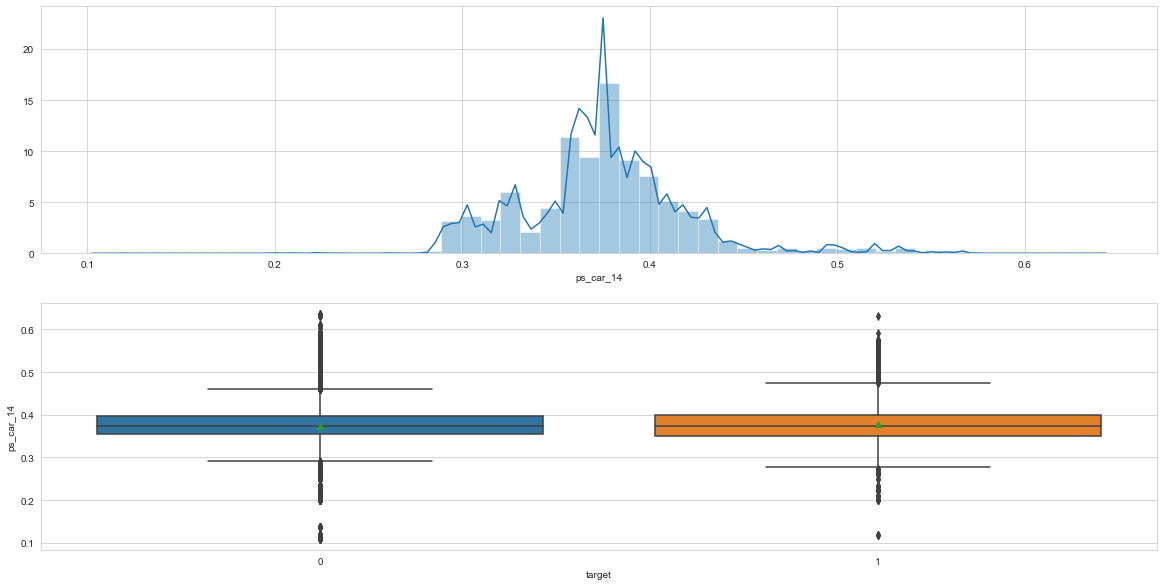

In [186]:
fig,ax = plt.subplots(2,1,figsize=(20,10))
ax1,ax2 = ax.flatten()
sns.distplot(df['ps_car_14'],ax=ax1)
sns.boxplot(x=target,y=df['ps_car_14'],showmeans=True,ax=ax2)

In [187]:
df['ps_car_14'].max()

0.6363961031

In [188]:
df['ps_car_14'].min()

0.1095445115

In [189]:
anova_test('ps_car_14')

Consider this feature


- Correlation exsist between ps_car_14 and target
- Considering this feature in to the model building

### Feature ps_car_15

In [190]:
df['ps_car_15'].nunique()

15

In [191]:
df_metedata.loc['ps_car_15','DTypes']

'float64'

In [192]:
df['ps_car_15'].value_counts()

3.605551    109765
3.464102     77200
3.316625     68737
3.162278     63323
3.741657     57757
2.828427     48680
3.000000     48537
2.645751     30388
2.449490     20445
2.236068     19397
0.000000     14186
2.000000     12830
1.732051     10744
1.000000      6708
1.414214      6515
Name: ps_car_15, dtype: int64

- It is highly improblable for the feature ps_car_15 to be a Continious with only 15 unique values among 595212 records..so it has to be ordinal even data seems like that

In [197]:
df_metedata.loc['ps_car_15','DTypes'] = 'Ordinal'

In [198]:
crosstab_ps_car_15 = pd.crosstab(df['ps_car_15'],target)
crosstab_ps_car_15

target          0     1
ps_car_15              
0.000000    13844   342
1.000000     6540   168
1.414214     6358   157
1.732051    10498   246
2.000000    12489   341
2.236068    18845   552
2.449490    19841   604
2.645751    29494   894
2.828427    47117  1563
3.000000    46876  1661
3.162278    61020  2303
3.316625    66122  2615
3.464102    74140  3060
3.605551   104892  4873
3.741657    55442  2315

In [199]:
chi2_test('ps_car_15')

Consider this feature


- Correlation exsist between ps_car_15 and target
- Considering this feature in to the model building

### Feature ps_calc_01

In [200]:
df['ps_calc_01'].nunique()

10

In [201]:
df_metedata.loc['ps_calc_01','DTypes']

'float64'

In [202]:
df['ps_calc_01'].value_counts()

0.6    59837
0.0    59780
0.8    59710
0.5    59612
0.7    59545
0.2    59513
0.1    59504
0.3    59377
0.4    59248
0.9    59086
Name: ps_calc_01, dtype: int64

- It is highly improblable for the feature ps_calc_01 to be a Continious with only 10 unique values among 595212 records..so it has to be ordinal even data seems like that

In [203]:
df_metedata.loc['ps_calc_01','DTypes'] = 'Ordinal'

In [204]:
crosstab_ps_calc_01 = pd.crosstab(df['ps_calc_01'],target)
crosstab_ps_calc_01

target          0     1
ps_calc_01             
0.0         57620  2160
0.1         57422  2082
0.2         57372  2141
0.3         57186  2191
0.4         57068  2180
0.5         57357  2255
0.6         57706  2131
0.7         57321  2224
0.8         57595  2115
0.9         56871  2215

In [205]:
chi2_test('ps_calc_01')

Don't consider this feature


- Correlation doesn't exsist between ps_calc_01 and target
- Not Considering this feature in to the model building

In [206]:
df_metedata.loc['ps_calc_01','Dropped'] =True

### Feature ps_calc_02

In [207]:
df['ps_calc_02'].nunique()

10

In [208]:
df_metedata.loc['ps_calc_02','DTypes']

'float64'

In [209]:
df['ps_calc_02'].value_counts()

0.5    60070
0.4    59823
0.0    59618
0.3    59593
0.7    59502
0.6    59501
0.2    59385
0.1    59383
0.9    59219
0.8    59118
Name: ps_calc_02, dtype: int64

- It is highly improblable for the feature ps_calc_02 to be a Continious with only 10 unique values among 595212 records..so it has to be ordinal even data seems like that

In [210]:
df_metedata.loc['ps_calc_02','DTypes'] = 'Ordinal'

In [211]:
crosstab_ps_calc_02 = pd.crosstab(df['ps_calc_02'],target)
crosstab_ps_calc_02

target          0     1
ps_calc_02             
0.0         57534  2084
0.1         57255  2128
0.2         57191  2194
0.3         57421  2172
0.4         57569  2254
0.5         57909  2161
0.6         57272  2229
0.7         57339  2163
0.8         56938  2180
0.9         57090  2129

In [213]:
chi2_test('ps_calc_02')

Don't consider this feature


- Correlation doesn't exsist between ps_calc_02 and target
- Not Considering this feature in to the model building

In [214]:
df_metedata.loc['ps_calc_02','Dropped'] =True

### Feature ps_calc_03

In [215]:
df['ps_calc_03'].nunique()

10

In [216]:
df_metedata.loc['ps_calc_03','DTypes']

'float64'

In [217]:
df['ps_calc_03'].value_counts()

0.1    60036
0.5    59832
0.3    59819
0.6    59521
0.8    59509
0.9    59418
0.7    59393
0.0    59318
0.4    59229
0.2    59137
Name: ps_calc_03, dtype: int64

- It is highly improblable for the feature ps_calc_03 to be a Continious with only 10 unique values among 595212 records..so it has to be ordinal even data seems like that

In [218]:
df_metedata.loc['ps_calc_03','DTypes'] = 'Ordinal'

In [219]:
crosstab_ps_calc_03 = pd.crosstab(df['ps_calc_03'],target)
crosstab_ps_calc_03

target          0     1
ps_calc_03             
0.0         57238  2080
0.1         57892  2144
0.2         56968  2169
0.3         57602  2217
0.4         57045  2184
0.5         57638  2194
0.6         57363  2158
0.7         57250  2143
0.8         57277  2232
0.9         57245  2173

In [220]:
chi2_test('ps_calc_03')

Don't consider this feature


- Correlation doesn't exsist between ps_calc_03 and target
- Not Considering this feature in to the model building

In [221]:
df_metedata.loc['ps_calc_03','Dropped'] =True

### Feature ps_calc_04

In [222]:
df['ps_calc_04'].nunique()

6

In [223]:
df_metedata.loc['ps_calc_04','DTypes']

'int64'

In [224]:
df['ps_calc_04'].value_counts()

2    193977
3    175512
1    108012
4     79606
0     23912
5     14193
Name: ps_calc_04, dtype: int64

- It is highly improblable for the feature ps_calc_04 to be a Continious with only 6 unique values among 595212 records..so it has to be ordinal even data seems like that

In [225]:
df_metedata.loc['ps_calc_04','DTypes'] = 'Ordinal'

In [226]:
crosstab_ps_calc_04 = pd.crosstab(df['ps_calc_04'],target)
crosstab_ps_calc_04

target           0     1
ps_calc_04              
0            23057   855
1           104085  3927
2           186828  7149
3           169158  6354
4            76738  2868
5            13652   541

In [227]:
chi2_test('ps_calc_04')

Don't consider this feature


- Correlation doesn't exsist between ps_calc_04 and target
- Not Considering this feature in to the model building

In [228]:
df_metedata.loc['ps_calc_04','Dropped'] =True

### Feature ps_calc_05

In [229]:
df['ps_calc_05'].nunique()

7

In [230]:
df_metedata.loc['ps_calc_05','DTypes']

'int64'

In [231]:
df['ps_calc_05'].value_counts()

2    195160
1    170860
3    119192
0     61226
4     40682
5      7534
6       558
Name: ps_calc_05, dtype: int64

- It is highly improblable for the feature ps_calc_05 to be a Continious with only 7 unique values among 595212 records..so it has to be ordinal even data seems like that

In [232]:
df_metedata.loc['ps_calc_05','DTypes'] = 'Ordinal'

In [233]:
crosstab_ps_calc_05 = pd.crosstab(df['ps_calc_05'],target)
crosstab_ps_calc_05

target           0     1
ps_calc_05              
0            59010  2216
1           164640  6220
2           188009  7151
3           114900  4292
4            39189  1493
5             7242   292
6              528    30

In [234]:
chi2_test('ps_calc_05')

Don't consider this feature


- Correlation doesn't exsist between ps_calc_05 and target
- Not Considering this feature in to the model building

In [235]:
df_metedata.loc['ps_calc_05','Dropped'] =True

### Feature ps_calc_06

In [236]:
df['ps_calc_06'].nunique()

11

In [237]:
df_metedata.loc['ps_calc_06','DTypes']

'int64'

In [238]:
df['ps_calc_06'].value_counts()

8     175015
7     139771
9     129207
6      73478
10     43085
5      26613
4       6705
3       1199
2        132
1          6
0          1
Name: ps_calc_06, dtype: int64

- It is highly improblable for the feature ps_calc_06 to be a Continious with only 11 unique values among 595212 records..so it has to be ordinal even data seems like that

In [239]:
df_metedata.loc['ps_calc_06','DTypes'] = 'Ordinal'

In [240]:
crosstab_ps_calc_06 = pd.crosstab(df['ps_calc_06'],target)
crosstab_ps_calc_06

target           0     1
ps_calc_06              
0                1     0
1                6     0
2              129     3
3             1161    38
4             6448   257
5            25655   958
6            70804  2674
7           134743  5028
8           168497  6518
9           124532  4675
10           41542  1543

In [242]:
chi2_test('ps_calc_06')

Don't consider this feature


- Correlation doesn't exsist between ps_calc_06 and target
- Not Considering this feature in to the model building

In [243]:
df_metedata.loc['ps_calc_06','Dropped'] =True

### Feature ps_calc_07

In [244]:
df['ps_calc_07'].nunique()

10

In [245]:
df_metedata.loc['ps_calc_07','DTypes']

'int64'

In [246]:
df['ps_calc_07'].value_counts()

3    162414
2    139101
4    122039
1     69309
5     61705
6     20403
0     15290
7      4381
8       547
9        23
Name: ps_calc_07, dtype: int64

- It is highly improblable for the feature ps_calc_07 to be a Continious with only 10 unique values among 595212 records..so it has to be ordinal even data seems like that

In [247]:
df_metedata.loc['ps_calc_07','DTypes'] = 'Ordinal'

In [248]:
crosstab_ps_calc_07 = pd.crosstab(df['ps_calc_07'],target)
crosstab_ps_calc_07

target           0     1
ps_calc_07              
0            14735   555
1            66725  2584
2           134040  5061
3           156573  5841
4           117542  4497
5            59524  2181
6            19627   776
7             4201   180
8              530    17
9               21     2

In [249]:
chi2_test('ps_calc_07')

Don't consider this feature


- Correlation doesn't exsist between ps_calc_07 and target
- Not Considering this feature in to the model building

In [250]:
df_metedata.loc['ps_calc_07','Dropped'] =True

### Feature ps_calc_08

In [251]:
df['ps_calc_08'].nunique()

11

In [252]:
df_metedata.loc['ps_calc_08','DTypes']

'int64'

In [253]:
df['ps_calc_08'].value_counts()

9     151746
10    151330
8     102944
11     91639
7      49567
12     25392
6      17183
5       4469
4        842
3         90
2         10
Name: ps_calc_08, dtype: int64

- It is highly improblable for the feature ps_calc_08 to be a Continious with only 11 unique values among 595212 records..so it has to be ordinal even data seems like that

In [254]:
df_metedata.loc['ps_calc_08','DTypes'] = 'Ordinal'

In [255]:
crosstab_ps_calc_08 = pd.crosstab(df['ps_calc_08'],target)
crosstab_ps_calc_08

target           0     1
ps_calc_08              
2               10     0
3               87     3
4              812    30
5             4299   170
6            16539   644
7            47782  1785
8            99098  3846
9           146263  5483
10          145885  5445
11           88263  3376
12           24480   912

In [256]:
chi2_test('ps_calc_08')

Don't consider this feature


- Correlation doesn't exsist between ps_calc_08 and target
- Not Considering this feature in to the model building

In [257]:
df_metedata.loc['ps_calc_08','Dropped'] =True

### Feature ps_calc_09

In [258]:
df['ps_calc_09'].nunique()

8

In [259]:
df_metedata.loc['ps_calc_09','DTypes']

'int64'

In [260]:
df['ps_calc_09'].value_counts()

2    182519
3    152829
1    121391
4     76973
0     34479
5     22976
6      3782
7       263
Name: ps_calc_09, dtype: int64

- It is highly improblable for the feature ps_calc_09 to be a Continious with only 8 unique values among 595212 records..so it has to be ordinal even data seems like that

In [261]:
df_metedata.loc['ps_calc_09','DTypes'] = 'Ordinal'

In [262]:
crosstab_ps_calc_09 = pd.crosstab(df['ps_calc_09'],target)
crosstab_ps_calc_09

target           0     1
ps_calc_09              
0            33210  1269
1           117080  4311
2           175794  6725
3           147245  5584
4            74121  2852
5            22171   805
6             3643   139
7              254     9

In [263]:
chi2_test('ps_calc_09')

Don't consider this feature


- Correlation doesn't exsist between ps_calc_09 and target
- Not Considering this feature in to the model building

In [264]:
df_metedata.loc['ps_calc_09','Dropped'] =True

### Feature ps_calc_10

In [265]:
df['ps_calc_10'].nunique()

26

In [266]:
df_metedata.loc['ps_calc_10','DTypes']

'int64'

In [267]:
df['ps_calc_10'].value_counts()

8     82043
7     78009
9     76772
10    65307
6     64567
11    49566
5     46181
12    34914
4     27204
13    22709
14    13694
3     12981
15     7701
2      4566
16     4110
17     2041
1      1107
18      922
19      401
20      168
0       139
21       65
22       33
23       10
24        1
25        1
Name: ps_calc_10, dtype: int64

-It is highly improblable for the feature ps_calc_10 to be a Continious with only 26 unique values among 595212 records..so it has to be ordinal even data seems like that

In [268]:
df_metedata.loc['ps_calc_10','DTypes'] = 'Ordinal'

In [269]:
crosstab_ps_calc_10 = pd.crosstab(df['ps_calc_10'],target)
crosstab_ps_calc_10

target          0     1
ps_calc_10             
0             133     6
1            1071    36
2            4401   165
3           12508   473
4           26232   972
5           44522  1659
6           62245  2322
7           75139  2870
8           79120  2923
9           73857  2915
10          62880  2427
11          47794  1772
12          33651  1263
13          21925   784
14          13151   543
15           7407   294
16           3976   134
17           1975    66
18            882    40
19            382    19
20            160     8
21             63     2
22             32     1
23             10     0
24              1     0
25              1     0

In [270]:
chi2_test('ps_calc_10')

Don't consider this feature


- Correlation doesn't exsist between ps_calc_10 and target
- Not Considering this feature in to the model building

In [271]:
df_metedata.loc['ps_calc_10','Dropped'] =True

### Feature ps_calc_11

In [272]:
df['ps_calc_11'].nunique()

20

In [273]:
df_metedata.loc['ps_calc_11','DTypes']

'int64'

In [274]:
df['ps_calc_11'].value_counts()

5     102512
4      93890
6      93110
7      72148
3      69519
8      49105
2      38364
9      29827
10     16233
1      14035
11      7928
12      3583
0       2461
13      1575
14       631
15       189
16        68
17        22
18        11
19         1
Name: ps_calc_11, dtype: int64

- It is highly improblable for the feature ps_calc_11 to be a Continious with only 20 unique values among 595212 records..so it has to be ordinal even data seems like that

In [275]:
df_metedata.loc['ps_calc_11','DTypes'] = 'Ordinal'

In [276]:
crosstab_ps_calc_11 = pd.crosstab(df['ps_calc_11'],target)
crosstab_ps_calc_11

target          0     1
ps_calc_11             
0            2371    90
1           13500   535
2           36981  1383
3           66913  2606
4           90492  3398
5           98874  3638
6           89718  3392
7           69574  2574
8           47220  1885
9           28774  1053
10          15632   601
11           7619   309
12           3448   135
13           1518    57
14            603    28
15            181     8
16             66     2
17             22     0
18             11     0
19              1     0

In [277]:
chi2_test('ps_calc_11')

Don't consider this feature


- Correlation doesn't exsist between ps_calc_11 and target
- Not Considering this feature in to the model building

In [278]:
df_metedata.loc['ps_calc_11','Dropped'] =True

### Feature ps_calc_12

In [279]:
df['ps_calc_12'].nunique()

11

In [280]:
df_metedata.loc['ps_calc_12','DTypes']

'int64'

In [281]:
df['ps_calc_12'].value_counts()

1     203280
2     145321
0     141001
3      70351
4      25778
5       7290
6       1724
7        387
8         66
9         11
10         3
Name: ps_calc_12, dtype: int64

- It is highly improblable for the feature ps_calc_12 to be a Continious with only 11 unique values among 595212 records..so it has to be ordinal even data seems like that

In [282]:
df_metedata.loc['ps_calc_12','DTypes'] = 'Ordinal'

In [283]:
crosstab_ps_calc_12 = pd.crosstab(df['ps_calc_12'],target)
crosstab_ps_calc_12

target           0     1
ps_calc_12              
0           135818  5183
1           195882  7398
2           140000  5321
3            67827  2524
4            24860   918
5             7019   271
6             1658    66
7              377    10
8               63     3
9               11     0
10               3     0

In [284]:
chi2_test('ps_calc_12')

Don't consider this feature


- Correlation doesn't exsist between ps_calc_12 and target
- Not Considering this feature in to the model building

In [285]:
df_metedata.loc['ps_calc_12','Dropped'] =True

### Feature ps_calc_13

In [286]:
df['ps_calc_13'].nunique()

14

In [287]:
df_metedata.loc['ps_calc_13','DTypes']

'int64'

In [288]:
df['ps_calc_13'].value_counts()

2     139334
3     132412
1      96661
4      95753
5      54560
0      33658
6      26326
7      11003
8       3882
9       1160
10       351
11        88
12        20
13         4
Name: ps_calc_13, dtype: int64

- It is highly improblable for the feature ps_calc_13 to be a Continious with only 14 unique values among 595212 records..so it has to be ordinal even data seems like that

In [289]:
df_metedata.loc['ps_calc_13','DTypes'] = 'Ordinal'

In [290]:
crosstab_ps_calc_13 = pd.crosstab(df['ps_calc_13'],target)
crosstab_ps_calc_13

target           0     1
ps_calc_13              
0            32401  1257
1            93153  3508
2           134274  5060
3           127597  4815
4            92233  3520
5            52559  2001
6            25384   942
7            10615   388
8             3734   148
9             1120    40
10             340    11
11              86     2
12              19     1
13               3     1

In [291]:
chi2_test('ps_calc_13')

Don't consider this feature


- Correlation doesn't exsist between ps_calc_13 and target
- Not Considering this feature in to the model building

In [292]:
df_metedata.loc['ps_calc_13','Dropped'] =True

### Feature ps_calc_14

In [293]:
df['ps_calc_14'].nunique()

24

In [294]:
df_metedata.loc['ps_calc_14','DTypes']

'int64'

In [295]:
df['ps_calc_14'].value_counts()

7     86673
8     82177
6     80897
9     68487
5     64029
10    52049
4     42596
11    35341
3     22825
12    22227
13    12883
2      8942
14     6934
15     3536
1      2398
16     1666
17      735
0       310
18      305
19      131
20       47
21       18
22        5
23        1
Name: ps_calc_14, dtype: int64

- It is highly improblable for the feature ps_calc_14 to be a Continious with only 24 unique values among 595212 records..so it has to be ordinal even data seems like that

In [296]:
df_metedata.loc['ps_calc_14','DTypes'] = 'Ordinal'

In [297]:
crosstab_ps_calc_14 = pd.crosstab(df['ps_calc_14'],target)
crosstab_ps_calc_14

target          0     1
ps_calc_14             
0             298    12
1            2317    81
2            8620   322
3           22038   787
4           41062  1534
5           61643  2386
6           77911  2986
7           83542  3131
8           79242  2935
9           65953  2534
10          50165  1884
11          34029  1312
12          21435   792
13          12402   481
14           6663   271
15           3403   133
16           1597    69
17            709    26
18            296     9
19            123     8
20             46     1
21             18     0
22              5     0
23              1     0

In [299]:
chi2_test('ps_calc_14')

Don't consider this feature


- Correlation doesn't exsist between ps_calc_14 and target
- Not Considering this feature in to the model building

In [300]:
df_metedata.loc['ps_calc_14','Dropped'] =True

In [301]:
df_metedata

DTypes  Dropped     Missing
id                    int64     True    7.000000
ps_ind_01           Ordinal    False    0.000000
ps_ind_02_cat   Categorical    False    1.000000
ps_ind_03             int64    False    2.000000
ps_ind_04_cat   Categorical    False    0.000000
ps_ind_05_cat   Categorical    False    0.000000
ps_ind_06_bin   Categorical    False    0.000000
ps_ind_07_bin   Categorical    False    0.000000
ps_ind_08_bin   Categorical    False    0.000000
ps_ind_09_bin   Categorical    False    0.000000
ps_ind_10_bin   Categorical     True    0.000000
ps_ind_11_bin   Categorical     True    0.000000
ps_ind_12_bin   Categorical    False    0.000000
ps_ind_13_bin   Categorical     True    0.000000
ps_ind_14           Ordinal    False    0.000000
ps_ind_15           Ordinal    False    7.000000
ps_ind_16_bin   Categorical    False    1.000000
ps_ind_17_bin   Categorical    False    0.000000
ps_ind_18_bin   Categorical    False    0.000000
ps_reg_01           Ordinal    False    0.610991
ps_reg_02           Ordinal    False    0.439184
ps_reg_03           float64    False    0.894047
ps_car_01_cat   Categorical    False   11.000000
ps_car_02_cat   Categorical    False    1.000000
ps_car_03_cat   Categorical     True         NaN
ps_car_04_cat   Categorical    False    0.000000
ps_car_05_cat   Categorical    False    1.000000
ps_car_06_cat   Categorical    False   11.000000
ps_car_07_cat   Categorical    False    1.000000
ps_car_08_cat   Categorical    False    1.000000
ps_car_09_cat   Categorical    False    2.000000
ps_car_10_cat   Categorical     True    1.000000
ps_car_11_cat   Categorical    False  104.000000
ps_car_11           Ordinal    False    2.346100
ps_car_12           float64    False    0.379947
ps_car_13           float64    False    0.813265
ps_car_14           float64    False    0.374691
ps_car_15           Ordinal    False    3.065899
ps_calc_01          Ordinal     True    0.449756
ps_calc_02          Ordinal     True    0.449589
ps_calc_03          Ordinal     True    0.449849
ps_calc_04          Ordinal     True    2.000000
ps_calc_05          Ordinal     True    2.000000
ps_calc_06          Ordinal     True    8.000000
ps_calc_07          Ordinal     True    3.000000
ps_calc_08          Ordinal     True    9.000000
ps_calc_09          Ordinal     True    2.000000
ps_calc_10          Ordinal     True    8.000000
ps_calc_11          Ordinal     True    5.000000
ps_calc_12          Ordinal     True    1.000000
ps_calc_13          Ordinal     True    2.000000
ps_calc_14          Ordinal     True    7.000000
ps_calc_15_bin  Categorical     True    0.000000
ps_calc_16_bin  Categorical     True    1.000000
ps_calc_17_bin  Categorical     True    1.000000
ps_calc_18_bin  Categorical     True    0.000000
ps_calc_19_bin  Categorical     True    0.000000
ps_calc_20_bin  Categorical     True    0.000000

## MISSING VALUES AS PER NEW DATA TYPES

In [302]:
df_new = pd.read_csv('train.csv')
target_new = df_new['target']
df_new.drop(columns=['target'],inplace = True)

In [303]:
df_new.replace(to_replace=-1,value=np.nan,inplace=True)

In [304]:
for columns in df_new.columns.values:
    if df_metedata.loc[columns,'Dropped']:
        df_new.drop(columns=[columns],inplace=True)

In [305]:
for col in df_new.columns:
    if ((df_metedata.loc[col,'DTypes'] == 'Categorical') or (df_metedata.loc[col,'DTypes'] == 'Ordinal')):
        df_new[col].fillna(df_new[col].mode()[0],inplace=True)
        df_metedata.loc[col,'Missing'] = df_new[col].mode()[0]
    else:
        df_new[col].fillna(df_new[col].mean(),inplace=True)
        df_metedata.loc[col,'Missing'] = df_new[col].mean()
        

In [306]:
df_new.shape

(595212, 32)

### Pickling the Metadata Dataframe

In [307]:
import pickle
pickle.dump(df_metedata,open('df_metedata_pickle','wb'))